<a href="https://colab.research.google.com/github/contatofe/Desafios/blob/main/Desafio_1_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm
!pip install catboost

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Analisando o Dataframe


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/data_cancer2.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 32','id'])

In [ ]:
#Todos os campos estão preenchidos (sem dados nulos) e em seu Tipo correto.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# O df não possui dados duplicados.

df.duplicated().sum()

0

In [ ]:
#Os dados parecem ter seus valores coerentes, sem números muito discrepantes.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


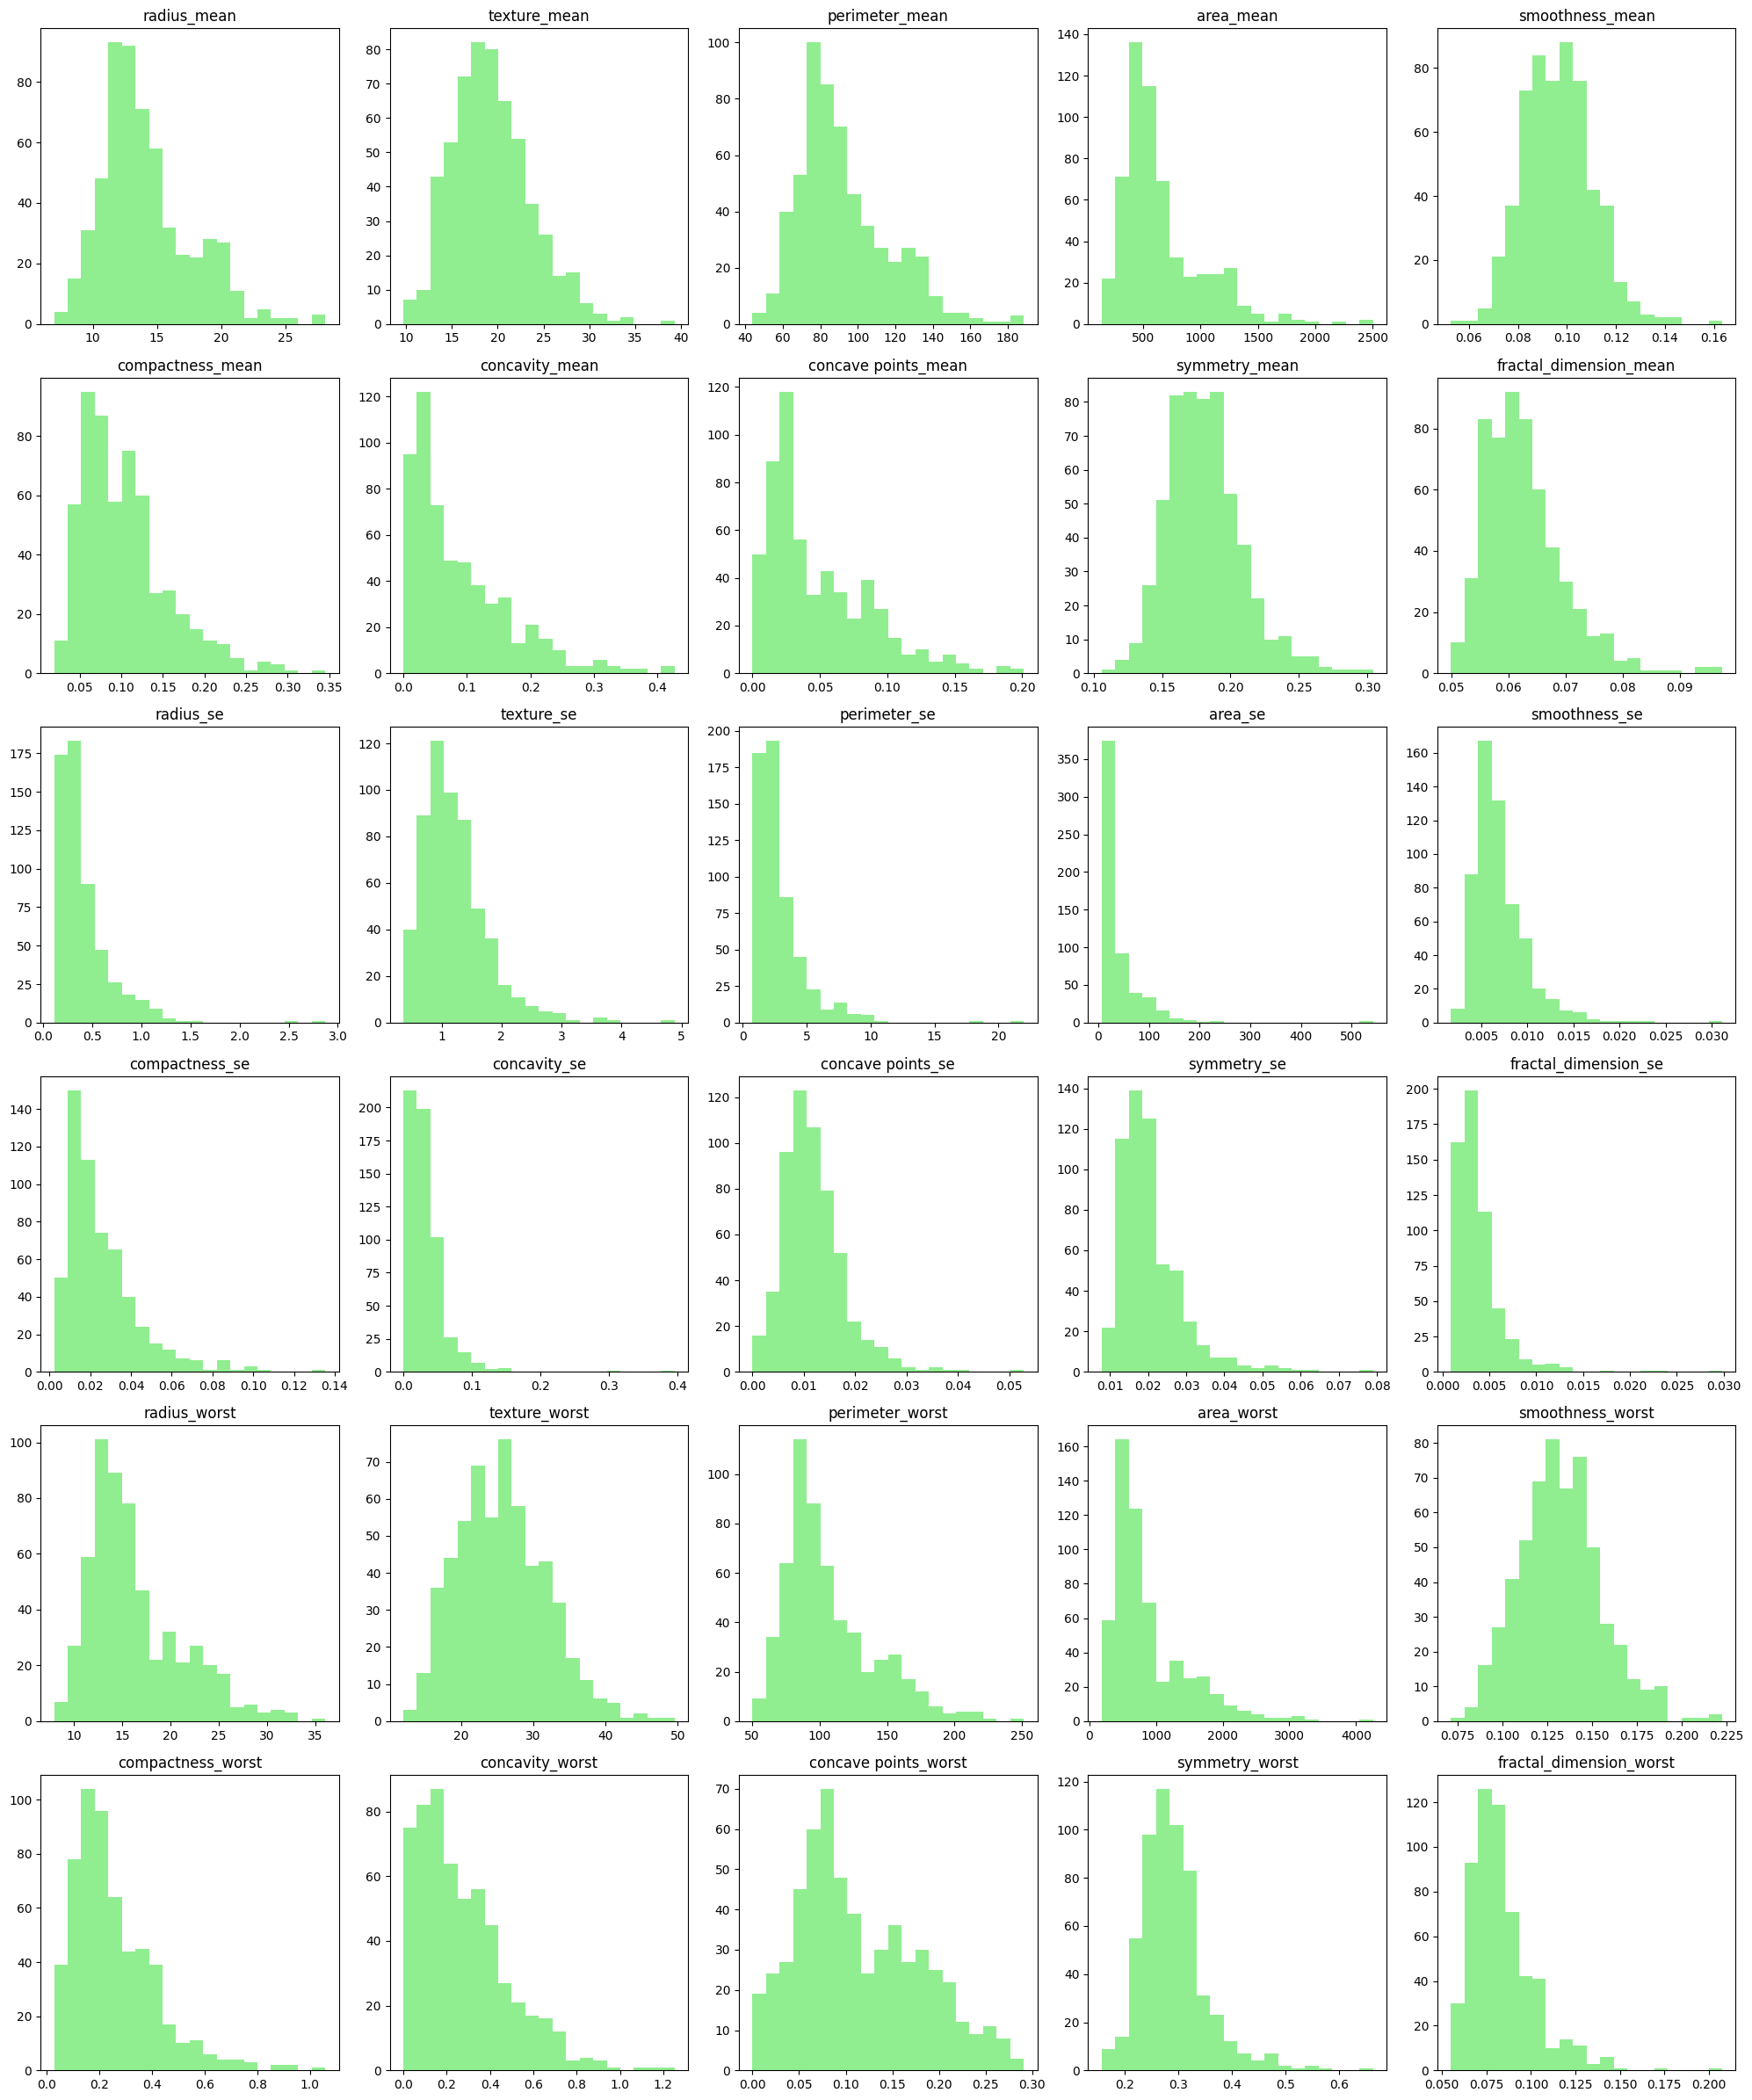

In [ ]:
#Visualizando os histogramas de cada coluna

num_columns = 5
num_rows = -(-len(df.columns) // num_columns) - 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df.drop(columns=['diagnosis']).columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='lightgreen')
    ax.set_title(column)

plt.tight_layout()
plt.show()

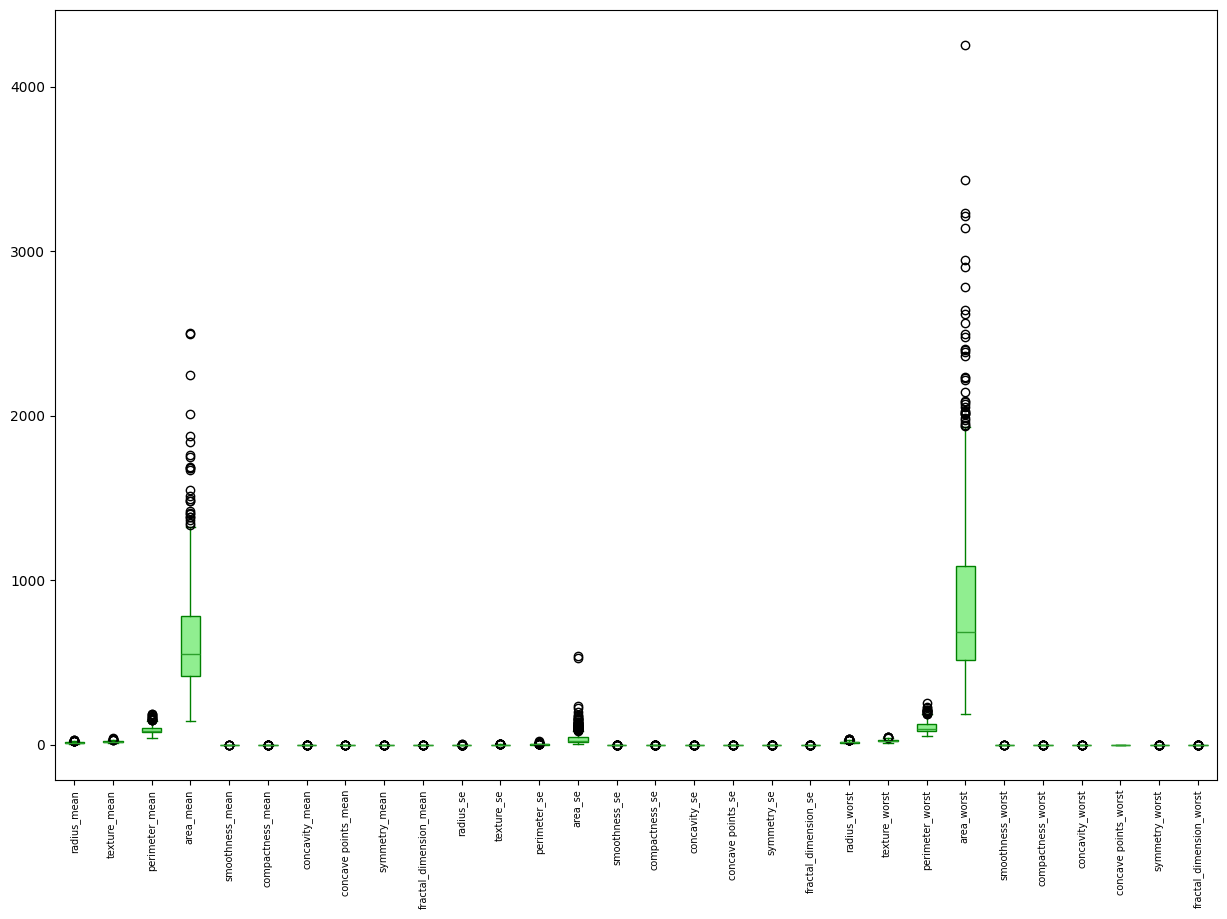

In [ ]:
#Visualizando Boxplots das colunas. Apesar de haver uma série de valores outliers, optei por manter, pois as observações parecem ser todas reais.

df.boxplot(figsize=(15,10), grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'), whiskerprops=dict(color='green'), capprops=dict(color='green'))
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Pré Processamento

In [ ]:
previsores = df.drop(columns=['diagnosis'])
alvo = df['diagnosis']

In [ ]:
#transformando dados alvo em números.

alvo.replace({'M':0, 'B': 1}, inplace=True)

<ipython-input-19-53c7c2198e4f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  alvo.replace({'M':0, 'B': 1}, inplace=True)


In [ ]:
#escalonamento de variáveis previsoras

previsores_esc = StandardScaler().fit_transform(previsores)
pd.DataFrame(previsores_esc, columns=previsores.columns)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
#redução de dimensionalidade com PCA. As novas variáveis explicam 99% da variância dos dados.

pca = PCA(n_components=10)
previsores_pca = pca.fit_transform(previsores)
np.sum(pca.explained_variance_ratio_)


0.9999998946838415

In [ ]:
previsores_pca_esc = StandardScaler().fit_transform(previsores_pca)
pd.DataFrame(previsores_pca_esc)

,0,1,2,3,4,5,6,7,8,9
0,1.743043,-3.440692,1.832695,1.179529,-5.071150,-0.730672,-0.691848,0.243318,-1.892013,2.034531
1,1.906779,0.182972,-1.335313,-2.418269,0.686952,0.130422,0.034199,0.329757,1.233049,-0.290097
2,1.496120,0.458381,-0.064503,-0.568556,0.073931,1.531778,0.579237,-0.450001,0.441299,-0.645521
3,-0.611764,-0.788775,0.327197,1.592188,-1.127594,-0.750316,0.941423,-0.099443,0.839173,-0.497639
4,1.397781,2.216483,0.051866,-1.150718,-1.206486,-0.589635,0.249244,0.474770,-0.091591,-0.478123
...,...,...,...,...,...,...,...,...,...,...
564,2.124639,1.290300,1.511549,-0.888473,0.808655,0.228324,0.584442,0.060895,1.148537,-0.811883
565,1.570077,0.902061,0.001383,0.643550,1.967871,0.034436,-0.334159,0.836125,1.142080,1.702740
566,0.472520,0.556677,-0.393956,1.323031,0.975581,0.502772,1.609390,-0.726303,0.247201,-0.499407
567,1.690031,0.399528,-0.744801,3.203486,-0.564970,-2.359551,1.266866,-0.591128,-0.977221,2.124659


Do pré processamento temos, portanto, 5 data sets diferentes:

**Alvo** - variável dependente.

**previsores** - variáveis independentes sem processamento.

**previsores_esc** - variáveis independentes escalonadas.

**previsores_pca** - variáveis independentes com redução de dimensionalidades.

**previsores_pca_esc** - variáveis independentes com redução de dimensionalidades e escalonadas.

#

#Separando bases de treino e teste

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.2, random_state = 42)

#Criando Modelos

##Naive Bayes

In [ ]:
#previsões
naive = GaussianNB()
naive.fit(x_treino, y_treino)
previsoes_naive = naive.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))
print(classification_report(y_teste, previsoes_naive))
print(confusion_matrix(y_teste, previsoes_naive))

Acurácia: 97.37%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[40  3]
 [ 0 71]]


In [ ]:
#métricas - treino
previsoes_treino = naive.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 93.63%
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       169
           1       0.93      0.97      0.95       286

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455



array([[149,  20],
       [  9, 277]])

In [ ]:
#validação cruzada
kfold = KFold(n_splits = 30, shuffle=True, random_state = 42)
modelo = naive
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.82%


##Máquinas de vetores de suporte (SVM)

In [ ]:
#previsões
svm = SVC(kernel='rbf', random_state=42, C = 2)
svm.fit(x_treino, y_treino)
previsoes_svm = svm.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))
print(classification_report(y_teste, previsoes_svm))
print(confusion_matrix(y_teste, previsoes_svm))

Acurácia: 94.74%
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[37  6]
 [ 0 71]]


In [ ]:
#métricas - treino
previsoes_treino = svm.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 92.31%
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       169
           1       0.91      0.98      0.94       286

    accuracy                           0.92       455
   macro avg       0.93      0.90      0.92       455
weighted avg       0.93      0.92      0.92       455



array([[140,  29],
       [  6, 280]])

In [ ]:
#validação cruzada
modelo = svm
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 91.72%


##Regressão logística

In [ ]:
#previsões
logistica = LogisticRegression(random_state=42, max_iter=5000, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)
previsoes_log = logistica.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_log) * 100.0))
print(classification_report(y_teste, previsoes_log))
print(confusion_matrix(y_teste, previsoes_log))

Acurácia: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = logistica.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 96.26%
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       169
           1       0.96      0.98      0.97       286

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



array([[158,  11],
       [  6, 280]])

In [ ]:
#validação cruzada
modelo = logistica
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 95.05%


## Aprendizagem baseada em instâncias (KNN)

In [ ]:
#previsões
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)
previsoes_knn = knn.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))
print(classification_report(y_teste, previsoes_knn))
print(confusion_matrix(y_teste, previsoes_knn))

Acurácia: 93.86%
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[37  6]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = knn.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 95.16%
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       169
           1       0.94      0.98      0.96       286

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



array([[152,  17],
       [  5, 281]])

In [ ]:
#validação cruzada
modelo = knn
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.13%


##Árvore de decisões

In [ ]:
#previsões
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 42, max_depth=3)
arvore.fit(x_treino, y_treino)
previsoes_arvore = arvore.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))
print(classification_report(y_teste, previsoes_arvore))
print(confusion_matrix(y_teste, previsoes_arvore))

Acurácia: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = arvore.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 98.02%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       169
           1       0.98      0.99      0.98       286

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



array([[164,   5],
       [  4, 282]])

In [ ]:
#validação cruzada
modelo = arvore
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 93.67%


##Random Forest

In [ ]:
#previsões
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 42, max_depth=4)
random.fit(x_treino, y_treino)
previsoes_random = random.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))
print(classification_report(y_teste, previsoes_random))
print(confusion_matrix(y_teste, previsoes_random))

Acurácia: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = random.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 99.12%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       169
           1       0.99      1.00      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



array([[165,   4],
       [  0, 286]])

In [ ]:
#validação cruzada
modelo = random
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 95.76%


##XGBoost

In [ ]:
#previsões
xg = XGBClassifier(max_depth=2, learning_rate=0.07, n_estimators=250, objective='binary:logistic', random_state=42)
xg.fit(x_treino, y_treino)
previsoes_xg = xg.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))
print(classification_report(y_teste, previsoes_xg))
print(confusion_matrix(y_teste, previsoes_xg))

Acurácia: 97.37%
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = xg.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



array([[169,   0],
       [  0, 286]])

In [ ]:
#validação cruzada
modelo = xg
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.82%


##LightGBM

In [ ]:
#previsões
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

lgbm=lgb.train(parametros,lgb.Dataset(x_treino, label=y_treino), num_boost_round=200)
previsoes_lgbm = lgbm.predict(x_teste)
for i in range(0, (len(previsoes_lgbm))):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))
print(classification_report(y_teste, previsoes_lgbm))
print(confusion_matrix(y_teste, previsoes_lgbm))

Acurácia: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[40  3]
 [ 2 69]]


In [ ]:
#métricas - treino
previsoes_treino = lgbm.predict(x_treino)
for i in range(0, (len(previsoes_treino))):
    if previsoes_treino[i] >= .5:
       previsoes_treino[i] = 1
    else:
       previsoes_treino[i] = 0
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



array([[169,   0],
       [  0, 286]])

In [ ]:
#validação cruzada
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 341, number of negative: 209
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620000 -> initscore=0.489548
[LightGBM] [Info] Start training from score 0.489548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

##Catboost

In [ ]:
#previsões
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.05, depth = 4, random_state = 42,
                              eval_metric="Accuracy", verbose = False)
catboost.fit(x_treino, y_treino)
previsoes_cb = catboost.predict(x_teste)

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_cb) * 100.0))
print(classification_report(y_teste, previsoes_cb))
print(confusion_matrix(y_teste, previsoes_cb))

Acurácia: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]


In [ ]:
#métricas - treino
previsoes_treino = catboost.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print(classification_report(y_treino, previsoes_treino))
confusion_matrix(y_treino, previsoes_treino)

Acurácia: 98.24%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       169
           1       0.97      1.00      0.99       286

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



array([[161,   8],
       [  0, 286]])

In [ ]:
#validação cruzada
modelo = catboost
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 96.65%


##Resultados

**Naive Bayes** - Acurácia de teste: 97.37% | Acurácia média: 93.82%

**SVM** - Acurácia de teste: 94.74% | Acurácia média: 91.72%

**Regressão logística** - Acurácia de teste: 95.61% | Acurácia média: 95.05%

**KNN** - Acurácia de teste: 93.86% | Acurácia média: 93.13%

**Árvore de decisões** - Acurácia de teste: 95.61% | Acurácia média: 93.67%

**Random Forest** - Acurácia de teste: 96.49% | Acurácia média: 95.76%

**XGBoost** - Acurácia de teste: 97.37% | Acurácia média: 96.82%

**LightGBM** - Acurácia de teste: 95.61% | Acurácia média: 96.11%

**Catboost** - Acurácia de teste: 96.49% | Acurácia média: 96.65%

O algoritmo que mais se adequou às necessidades foi o XGBoost, prevendo com precisão grande parte dos dados de teste e também pontuando bem na validação cruzada.